In [1]:
# DataFlair Iris Classification
# Import Packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

C:\Users\SOUMOJIT CHATTERJEE\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
columns = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'Class_labels'] # As per the iris dataset information

In [17]:
# Load the data
df = pd.read_csv(r"D:\python\Bharat Intern\iris.data", names=columns)

In [18]:
df.head()

,Sepal length,Sepal width,Petal length,Petal width,Class_labels
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [19]:
# Some basic statistical analysis about the data
df.describe()

,Sepal length,Sepal width,Petal length,Petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


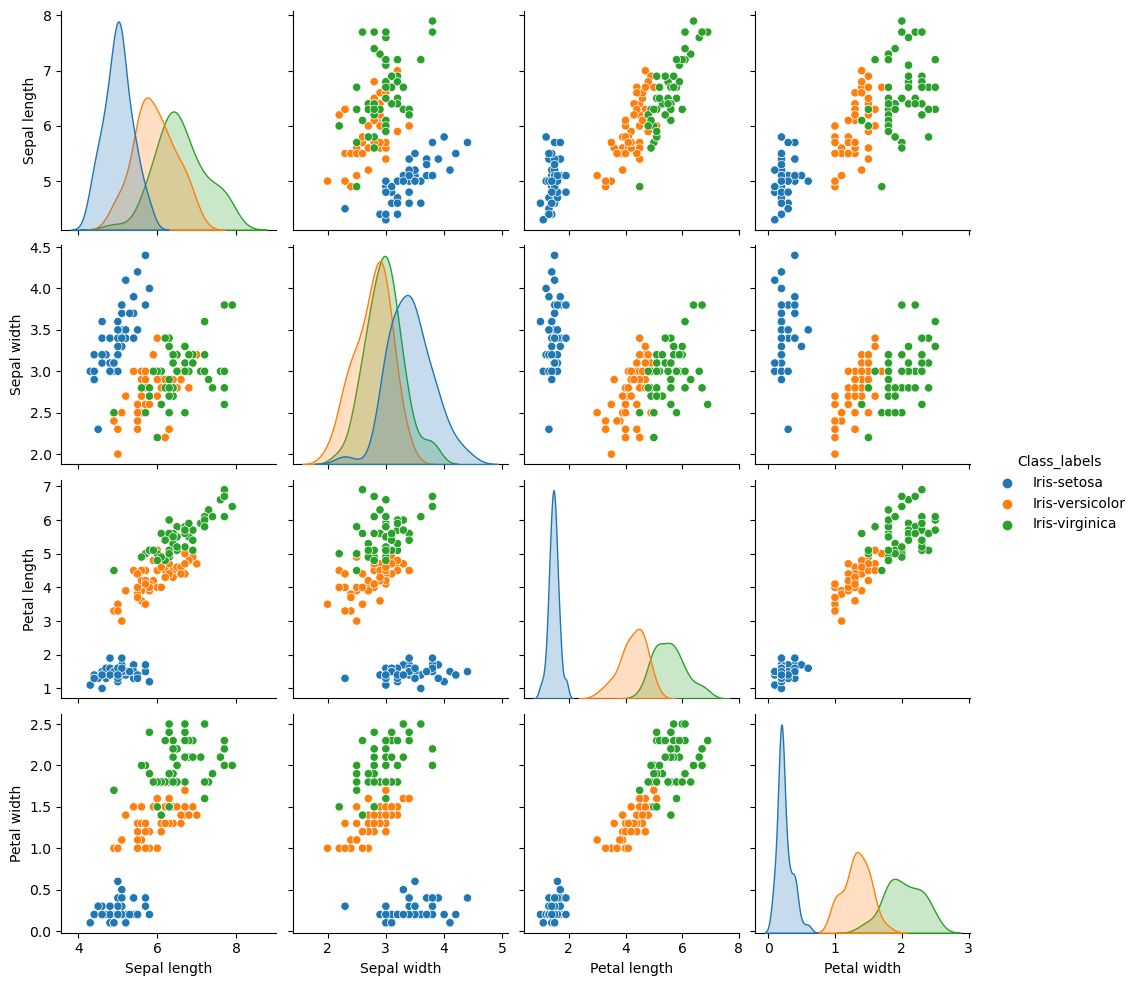

In [21]:
# Visualize the whole dataset
sns.pairplot(df, hue='Class_labels')

In [22]:
# Seperate features and target  
data = df.values
X = data[:,0:4]
Y = data[:,4]

In [23]:
# Calculate avarage of each features for all classes
Y_Data = np.array([np.average(X[:, i][Y==j].astype('float32')) for i in range (X.shape[1]) for j in (np.unique(Y))])
Y_Data_reshaped = Y_Data.reshape(4, 3)
Y_Data_reshaped = np.swapaxes(Y_Data_reshaped, 0, 1)
X_axis = np.arange(len(columns)-1)
width = 0.25

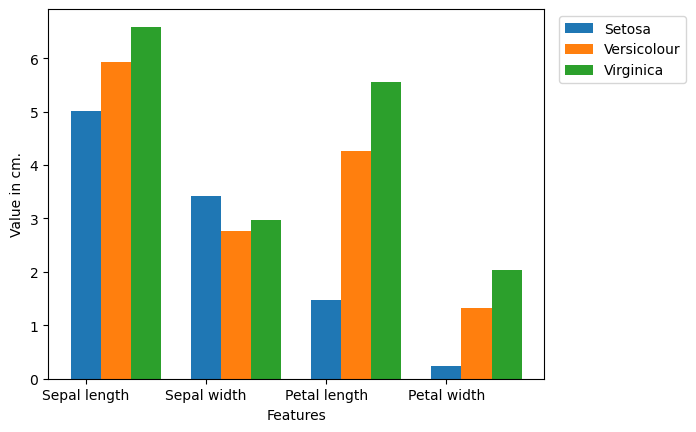

In [24]:
# Plot the avarage
plt.bar(X_axis, Y_Data_reshaped[0], width, label = 'Setosa')
plt.bar(X_axis+width, Y_Data_reshaped[1], width, label = 'Versicolour')
plt.bar(X_axis+width*2, Y_Data_reshaped[2], width, label = 'Virginica')
plt.xticks(X_axis, columns[:4])
plt.xlabel("Features")
plt.ylabel("Value in cm.")
plt.legend(bbox_to_anchor=(1.3,1))
plt.show()

In [25]:
# Split the data to train and test dataset.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [26]:
# Support vector machine algorithm
from sklearn.svm import SVC
svn = SVC()
svn.fit(X_train, y_train)

SVC()

In [27]:
# Predict from the test dataset
predictions = svn.predict(X_test)

In [28]:
# Calculate the accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9666666666666667

In [29]:
# A detailed classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.91      0.95        11
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [30]:
X_new = np.array([[3, 2, 1, 0.2], [  4.9, 2.2, 3.8, 1.1 ], [  5.3, 2.5, 4.6, 1.9 ]])
#Prediction of the species from the input vector
prediction = svn.predict(X_new)
print("Prediction of Species: {}".format(prediction))

Prediction of Species: ['Iris-setosa' 'Iris-versicolor' 'Iris-versicolor']


In [31]:
# Save the model
import pickle
with open('SVM.pickle', 'wb') as f:
    pickle.dump(svn, f)

In [32]:
# Load the model
with open('SVM.pickle', 'rb') as f:
    model = pickle.load(f)

In [33]:
model.predict(X_new)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor'], dtype=object)

In [34]:
# DataFlair Iris Classification

# Import Packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pickle



In [38]:
# Load the data
columns = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'Class_labels']
df = pd.read_csv(r"D:\python\Bharat Intern\iris\iris.data", names=columns)



In [39]:
# Some basic statistical analysis about the data
df.describe()



,Sepal length,Sepal width,Petal length,Petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


C:\Users\SOUMOJIT CHATTERJEE\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.91      0.83      0.87        12
 Iris-virginica       0.83      0.91      0.87        11

       accuracy                           0.90        30
      macro avg       0.91      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30

Decision Tree Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.91      0.83      0.87        12
 Iris-virginica       0.83      0.91      0.87        11

       accuracy                           0.90        30
      macro avg       0.91      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30

Random Forest Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa   

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

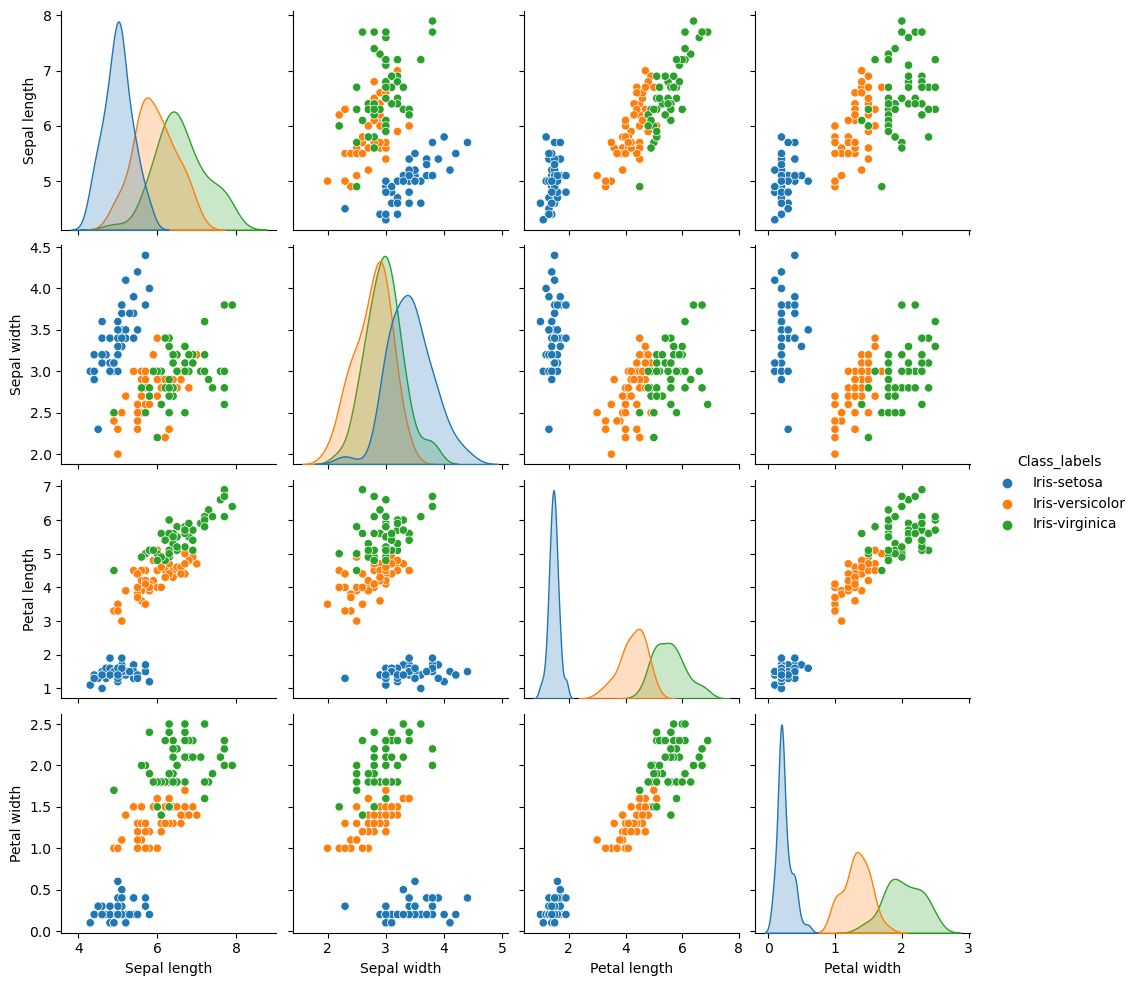

In [40]:
# Visualize the whole dataset
sns.pairplot(df, hue='Class_labels')

# Separate features and target
data = df.values
X = data[:, 0:4]
Y = data[:, 4]

# Split the data into train and test dataset.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

# Logistic Regression algorithm
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Predict from the test dataset
lr_predictions = lr.predict(X_test)

# Calculate the accuracy
lr_accuracy = accuracy_score(y_test, lr_predictions)

# A detailed classification report
print("Logistic Regression Classification Report:\n", classification_report(y_test, lr_predictions))

# Decision Tree algorithm
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Predict from the test dataset
dt_predictions = dt.predict(X_test)

# Calculate the accuracy
dt_accuracy = accuracy_score(y_test, dt_predictions)

# A detailed classification report
print("Decision Tree Classification Report:\n", classification_report(y_test, dt_predictions))

# Random Forest algorithm
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Predict from the test dataset
rf_predictions = rf.predict(X_test)

# Calculate the accuracy
rf_accuracy = accuracy_score(y_test, rf_predictions)

# A detailed classification report
print("Random Forest Classification Report:\n", classification_report(y_test, rf_predictions))

# Print the accuracy of all models
print("Logistic Regression Accuracy: ", lr_accuracy)
print("Decision Tree Accuracy: ", dt_accuracy)
print("Random Forest Accuracy: ", rf_accuracy)

# Prediction of the species from the input vector
X_new = np.array([[3, 2, 1, 0.2], [4.9, 2.2, 3.8, 1.1], [5.3, 2.5, 4.6, 1.9]])

lr_prediction = lr.predict(X_new)
print("Logistic Regression Prediction of Species: {}".format(lr_prediction))

dt_prediction = dt.predict(X_new)
print("Decision Tree Prediction of Species: {}".format(dt_prediction))

rf_prediction = rf.predict(X_new)
print("Random Forest Prediction of Species: {}".format(rf_prediction))

# Save the models
with open('LR.pickle', 'wb') as f:
    pickle.dump(lr, f)

with open('DT.pickle', 'wb') as f:
    pickle.dump(dt, f)

with open('RF.pickle', 'wb') as f:
    pickle.dump(rf, f)

# Load the models
with open('LR.pickle', 'rb') as f:
    lr_model = pickle.load(f)

with open('DT.pickle', 'rb') as f:
    dt_model = pickle.load(f)

with open('RF.pickle', 'rb') as f:
    rf_model = pickle.load(f)

lr_model.predict(X_new)
dt_model.predict(X_new)
rf_model.predict(X_new)


### svm accuracy is the highest with 0.97